In [1]:
import sys

sys.path.append("../src/")

from gpflow.kernels import RBF, Matern52
from gpflow.likelihoods import Gaussian, SwitchedLikelihood
from cogp import COGP

import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

cols = [c['color'] for c in matplotlib.rcParams['axes.prop_cycle']]

In [2]:
num_tasks = 2
Ns = 300
Xs = np.linspace(-12, 12, Ns)[:, None]
Ys = np.sinc(Xs)
Xs_aug = np.vstack((np.hstack((Xs, np.zeros_like(Xs))), np.hstack((Xs, np.ones_like(Xs)))))

N, M = 150, 40
X1 = np.random.uniform(-10, 10, N)[:, None]
X2 = np.random.uniform(-10, 10, N)[:,None]
X2 = X2[np.logical_or((X2<-2), (X2>2))][:,None]
Z = np.random.uniform(-10, 10, M)[:, None]
Y1 = np.sinc(X1) + np.random.randn(*X1.shape)*1e-2
Y2 = np.sinc(X2) + np.random.randn(*X2.shape)*1e-2

Z_aug = np.vstack((np.hstack((Z, np.zeros_like(Z))), np.hstack((Z, np.ones_like(Z)))))
X_aug = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_aug = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

print(X_aug.shape, Z_aug.shape, Y_aug.shape)

(269, 2) (80, 2) (269, 2)


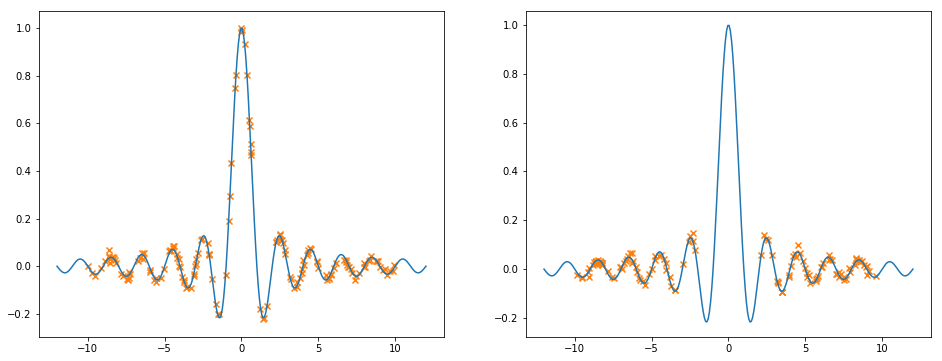

In [3]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(Xs, Ys)
plt.scatter(X1, Y1, c=cols[1], marker='x')

plt.subplot(122)
plt.plot(Xs, Ys)
plt.scatter(X2, Y2, c=cols[1], marker='x')

In [4]:
shared = [Matern52(1, active_dims=[0]) for _ in range(num_tasks)]
tasks = [Matern52(1, active_dims=[0]) for _ in range(num_tasks)]

lik = SwitchedLikelihood([Gaussian(), Gaussian()])

model = COGP(X_aug, Y_aug, shared, tasks, lik, Z_aug)

In [5]:
model.optimize(tf.train.AdamOptimizer(0.01))

/home/aboustati/anaconda3/envs/gp-env/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     fun: -552.73894226520952
     jac: array([  4.46985386e+00,  -0.00000000e+00,   5.98310987e+01, ...,
         4.34080643e-08,  -1.79105067e-07,  -1.03145916e-10])
 message: 'Finished iterations.'
  status: 'Finished iterations.'
 success: True
       x: array([  8.29365231e+00,   0.00000000e+00,   4.79994483e+00, ...,
        -4.98648383e-05,   8.11604572e-04,   9.99967837e-01])

In [6]:
Y_pred = model.predict_f(Xs_aug)

In [7]:
model.compute_log_likelihood()

552.73894226520974

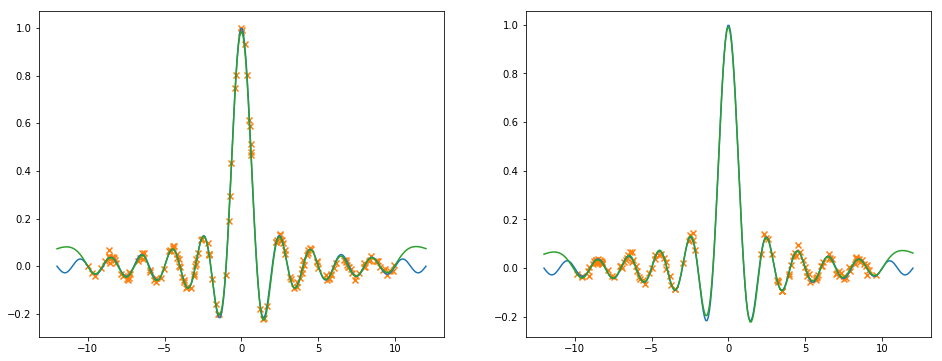

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(Xs, Ys)
plt.plot(Xs, Y_pred[0][:Ns,:], c=cols[2])
plt.scatter(X1, Y1, c=cols[1], marker='x')

plt.subplot(122)
plt.plot(Xs, Ys)
plt.plot(Xs, Y_pred[0][Ns:,:], c=cols[2])
plt.scatter(X2, Y2, c=cols[1], marker='x')

In [10]:
model.Z_tasks.value

array([[ 8.55013925,  0.        ],
       [ 5.27377679,  0.        ],
       [ 9.22090222,  0.        ],
       [-8.37632874,  0.        ],
       [ 6.03950056,  0.        ],
       [-0.91518908,  0.        ],
       [-2.54025074,  0.        ],
       [-1.33321286,  0.        ],
       [ 7.49494399,  0.        ],
       [-2.04317863,  0.        ],
       [ 8.7039153 ,  0.        ],
       [ 4.4668502 ,  0.        ],
       [-8.84158747,  0.        ],
       [-5.53845214,  0.        ],
       [-6.11037165,  0.        ],
       [-7.49165209,  0.        ],
       [-9.92777995,  0.        ],
       [ 9.88083617,  0.        ],
       [-6.72097129,  0.        ],
       [-7.51225178,  0.        ],
       [ 4.86804455,  0.        ],
       [-0.71556166,  0.        ],
       [-0.16499163,  0.        ],
       [ 6.87734263,  0.        ],
       [ 7.92495253,  0.        ],
       [ 1.21759758,  0.        ],
       [-2.22126375,  0.        ],
       [-4.13764372,  0.        ],
       [ 0.72622597,